In [2]:
#This Program uses a FCNN Multi-Class Method to classify AT-TPC Images
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, metrics, Model
from tensorflow.keras.callbacks import Callback
from data import load_image_h5
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow import reshape
import datetime
%load_ext tensorboard
print(tf.__version__)

2.1.0


In [3]:
dataset = h5py.File('simu_HDF.h5', 'r')
num_diodes = dataset['Num_diodes'][...]
x_pos = dataset['Xpos'][...]
y_pos = dataset['Ypos'][...]
histgrid = dataset['histgrid'][...]
dataset.close()

In [4]:
num_diodes.shape

(132,)

In [5]:
num_diodes[0:25]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

In [6]:
x_pos.shape

(6,)

In [7]:
#These Values should be divided by 100
x_pos[:]

array([    0., -3200., -2400., -1600.,  -800.,   800.])

In [8]:
y_pos.shape

(6,)

In [9]:
y_pos[:]

array([0., 0., 0., 0., 0., 0.])

In [10]:
histgrid.shape

(6, 132, 1001)

In [37]:
histgrid[1][0:132][11]

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
test_histogram = []
for i in range(132):
    test_histogram.append(histgrid[1][i][11])    
np.array(test_histogram)

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2., 18., 29., 43.,
       51.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 18., 26.,
       34., 55.])

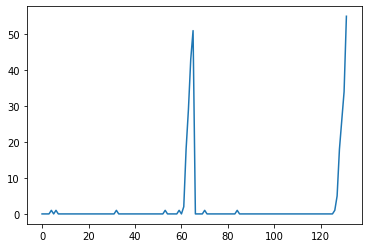

In [34]:
plt.plot(test_histogram)
plt.show()    

In [ ]:
plt.plot(range(132),histgrid[1][0:132][11])
plt.show()

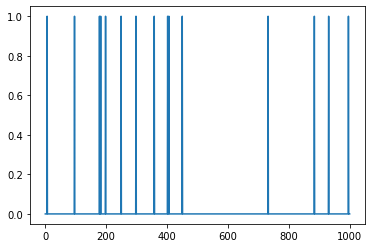

In [38]:
plt.plot(histgrid[5][:][0])
plt.show()